<a href="https://colab.research.google.com/github/Prasadchaskar/Flowers-Classification/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# import zipfile
# !unzip /content/drive/MyDrive/flowers.zip

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

In [126]:
path = '/content/17_flowers/train/'


In [127]:
l = list()
for folder in os.listdir(path):
    l.append(folder)

In [128]:
def shapeCount (Gpath):
    size = []
    pathname = str(Gpath+'*/*.jpg')
    imgsDir = gb.glob(pathname= pathname)
    for imgDir in tqdm(imgsDir):
        img = plt.imread(imgDir)
        size.append(img.shape)
    print("number of Imges = ",len(size))
    return pd.Series(size).value_counts()

In [129]:
print (shapeCount(path))

100%|██████████| 1190/1190 [00:06<00:00, 196.39it/s]

number of Imges =  1190
(500, 666, 3)    236
(666, 500, 3)     63
(500, 500, 3)     46
(750, 500, 3)     21
(500, 750, 3)     19
                ... 
(522, 499, 3)      1
(752, 500, 3)      1
(763, 500, 3)      1
(659, 500, 3)      1
(709, 499, 3)      1
Length: 438, dtype: int64


In [130]:
I_SIZE = 180
classes = ['daisy', 'bluebell', 'colts_foot', 'crocus', 'daffodil', 'fritillary', 'snowdrop', 'iris', 'dandelion', 'cowslip', 'lily_valley', 'pansy', 'sunflower', 'tigerlily', 'tulip', 'windflower', 'buttercup']


In [131]:
def reArangeData(data):
    # shuffle
    import random
    random.shuffle(data)
    
    # get X,Y
    X = []
    y = []
    for img,lable in data:
        X.append(img)
        y.append(lable)
        
    # convert it to npArray
    return np.array(X),np.array(y)

# this function take the images path => load all this images 
# => return X (numpy array of images) , y (numpy array of labels)
def loadImages (path):
    Dlist = []
    for folder in os.listdir(path):
        pathname = str(path +folder+'/*.jpg')
        files = gb.glob(pathname= pathname)
        for file in tqdm(files):
            image = cv2.imread(file ,cv2.IMREAD_COLOR )
            #image = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
            image_array = cv2.resize(image , (I_SIZE ,I_SIZE))
            Dlist.append( [image_array , classes.index(folder)] )
    print(len(Dlist))
    return reArangeData(Dlist)

In [132]:
X , y = loadImages(path)

100%|██████████| 70/70 [00:00<00:00, 227.54it/s]

1190


In [133]:
# normalize all data
# X=X/255

In [134]:
# # figure out samples of this data
# plt.figure(figsize=(10,10))
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.imshow(X[i])
#     plt.axis('off')
#     plt.title(classes[y[i]])

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [136]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /  255

In [137]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(X_train)

In [138]:
from tensorflow.keras import  models,layers
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(4, 4),
                  activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(60,activation='relu'),
    layers.Dense(17,activation='softmax')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [139]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [140]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
34/34 [==============================] - 2s 39ms/step - loss: 6.1223 - accuracy: 0.0915
Epoch 2/10
34/34 [==============================] - 1s 35ms/step - loss: 2.3101 - accuracy: 0.2885
Epoch 3/10
34/34 [==============================] - 1s 35ms/step - loss: 1.3354 - accuracy: 0.5882
Epoch 4/10
34/34 [==============================] - 1s 35ms/step - loss: 0.5603 - accuracy: 0.8357
Epoch 5/10
34/34 [==============================] - 1s 35ms/step - loss: 0.1447 - accuracy: 0.9757
Epoch 6/10
34/34 [==============================] - 1s 35ms/step - loss: 0.0351 - accuracy: 0.9963
Epoch 7/10
34/34 [==============================] - 1s 36ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 8/10
34/34 [==============================] - 1s 35ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 9/10
34/34 [==============================] - 1s 36ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10/10
34/34 [==============================] - 1s 35ms/step - loss: 0.0017 - accuracy: 1.0000


In [141]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 17ms/step - loss: 1.7379 - accuracy: 0.6303


[1.737865686416626, 0.6302521228790283]

In [142]:
y_pred = list()
for i in model.predict(X_test_scaled):
  y_pred.append(np.argmax(i))
y_pred = np.array(y_pred)

In [143]:
from sklearn.metrics import  classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.62      0.62      0.62         8
           2       0.50      0.75      0.60         4
           3       0.50      0.44      0.47         9
           4       0.80      0.50      0.62         8
           5       0.60      0.50      0.55         6
           6       0.00      0.00      0.00         3
           7       1.00      0.44      0.62         9
           8       1.00      0.83      0.91         6
           9       0.27      0.43      0.33         7
          10       0.82      0.82      0.82        11
          11       0.44      0.67      0.53         6
          12       0.75      1.00      0.86         6
          13       0.90      0.82      0.86        11
          14       0.67      0.57      0.62         7
          15       0.71      0.83      0.77         6
          16       0.33      0.33      0.33         6

    accuracy              

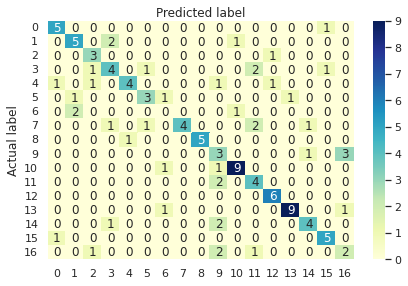

In [144]:
class_names = [i for i in range(18)]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
                fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [145]:
model.save("flower.h5")